In [37]:
import requests as r
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
url = "https://pokeapi.co/api/v2/pokemon/ditto"

response = requests.get('https://pokeapi.co/api/v2/pokemon/ditto', timeout=30)

print(response.text)

{"abilities":[{"ability":{"name":"limber","url":"https://pokeapi.co/api/v2/ability/7/"},"is_hidden":false,"slot":1},{"ability":{"name":"imposter","url":"https://pokeapi.co/api/v2/ability/150/"},"is_hidden":true,"slot":3}],"base_experience":101,"cries":{"latest":"https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/132.ogg","legacy":"https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/132.ogg"},"forms":[{"name":"ditto","url":"https://pokeapi.co/api/v2/pokemon-form/132/"}],"game_indices":[{"game_index":76,"version":{"name":"red","url":"https://pokeapi.co/api/v2/version/1/"}},{"game_index":76,"version":{"name":"blue","url":"https://pokeapi.co/api/v2/version/2/"}},{"game_index":76,"version":{"name":"yellow","url":"https://pokeapi.co/api/v2/version/3/"}},{"game_index":132,"version":{"name":"gold","url":"https://pokeapi.co/api/v2/version/4/"}},{"game_index":132,"version":{"name":"silver","url":"https://pokeapi.co/api/v2/version/5/"}},{"game_index":1

In [38]:
def get_all_pokemon(url="https://pokeapi.co/api/v2/pokemon", limit=100):
    all_pokemon = []
    next_url = f"{url}?limit={limit}"

    while next_url:
        response = requests.get(next_url, timeout=30)
        response.raise_for_status()  
        data = response.json()  
        all_pokemon.extend(data['results'])
        next_url = data['next']  

    return all_pokemon

try:
    all_pokemon = get_all_pokemon()
    df_pokemon = pd.DataFrame(all_pokemon)

    print(df_pokemon.head(10))

except requests.exceptions.Timeout:
    print("A conexão com a API expirou.")
except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro ao tentar acessar a API: {e}")

         name                                    url
0   bulbasaur   https://pokeapi.co/api/v2/pokemon/1/
1     ivysaur   https://pokeapi.co/api/v2/pokemon/2/
2    venusaur   https://pokeapi.co/api/v2/pokemon/3/
3  charmander   https://pokeapi.co/api/v2/pokemon/4/
4  charmeleon   https://pokeapi.co/api/v2/pokemon/5/
5   charizard   https://pokeapi.co/api/v2/pokemon/6/
6    squirtle   https://pokeapi.co/api/v2/pokemon/7/
7   wartortle   https://pokeapi.co/api/v2/pokemon/8/
8   blastoise   https://pokeapi.co/api/v2/pokemon/9/
9    caterpie  https://pokeapi.co/api/v2/pokemon/10/


In [34]:

def get_all_pokemon(url="https://pokeapi.co/api/v2/pokemon", limit=100):
    all_pokemon = []
    next_url = f"{url}?limit={limit}"

    while next_url:
        response = requests.get(next_url, timeout=30)
        response.raise_for_status() 
        data = response.json() 
        all_pokemon.extend(data['results'])
        next_url = data['next'] 

    return all_pokemon

def get_pokemon_details(url):
    response = requests.get(url, timeout=30)
    response.raise_for_status()  
    data = response.json()  
    return data

try:
    all_pokemon = get_all_pokemon()
    
    detailed_pokemon_data = []

    for pokemon in all_pokemon:
        details = get_pokemon_details(pokemon['url'])
        
       
        pokemon_info = {
            'id': details['id'],
            'name': details['name'],
            'base_experience': details['base_experience'],
            'height': details['height'],
            'weight': details['weight'],
            'abilities': ', '.join([ability['ability']['name'] for ability in details['abilities']]),
            'types': ', '.join([poke_type['type']['name'] for poke_type in details['types']]),
            'moves': ', '.join([move['move']['name'] for move in details['moves']])
        }
        detailed_pokemon_data.append(pokemon_info)

   
    df_pokemon = pd.DataFrame(detailed_pokemon_data)

    
    print(df_pokemon.head(10))

except requests.exceptions.Timeout:
    print("A conexão com a API expirou.")
except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro ao tentar acessar a API: {e}")

   id        name  base_experience  height  weight              abilities  \
0   1   bulbasaur             64.0       7      69  overgrow, chlorophyll   
1   2     ivysaur            142.0      10     130  overgrow, chlorophyll   
2   3    venusaur            263.0      20    1000  overgrow, chlorophyll   
3   4  charmander             62.0       6      85     blaze, solar-power   
4   5  charmeleon            142.0      11     190     blaze, solar-power   
5   6   charizard            267.0      17     905     blaze, solar-power   
6   7    squirtle             63.0       5      90     torrent, rain-dish   
7   8   wartortle            142.0      10     225     torrent, rain-dish   
8   9   blastoise            265.0      16     855     torrent, rain-dish   
9  10    caterpie             39.0       3      29  shield-dust, run-away   

           types                                              moves  
0  grass, poison  razor-wind, swords-dance, cut, bind, vine-whip...  
1  grass, po

   id        name  base_experience  height  weight              abilities  \
0   1   bulbasaur             64.0       7      69  overgrow, chlorophyll   
1   2     ivysaur            142.0      10     130  overgrow, chlorophyll   
2   3    venusaur            263.0      20    1000  overgrow, chlorophyll   
3   4  charmander             62.0       6      85     blaze, solar-power   
4   5  charmeleon            142.0      11     190     blaze, solar-power   
5   6   charizard            267.0      17     905     blaze, solar-power   
6   7    squirtle             63.0       5      90     torrent, rain-dish   
7   8   wartortle            142.0      10     225     torrent, rain-dish   
8   9   blastoise            265.0      16     855     torrent, rain-dish   
9  10    caterpie             39.0       3      29  shield-dust, run-away   

           types                                              moves  
0  grass, poison  razor-wind, swords-dance, cut, bind, vine-whip...  
1  grass, po

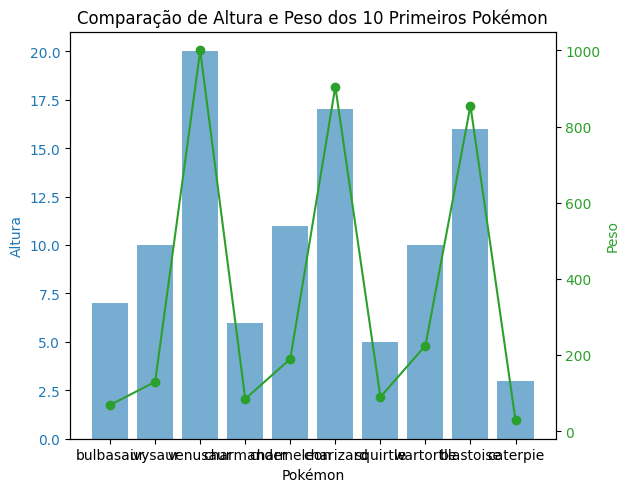

In [41]:



def get_all_pokemon(url="https://pokeapi.co/api/v2/pokemon", limit=100):
    all_pokemon = []
    next_url = f"{url}?limit={limit}"

    while next_url:
        response = requests.get(next_url, timeout=30)
        response.raise_for_status()
        data = response.json()
        all_pokemon.extend(data['results'])
        next_url = data['next']

    return all_pokemon

def get_pokemon_details(url):
    response = requests.get(url, timeout=30)
    response.raise_for_status()
    data = response.json()
    return data

try:
    all_pokemon = get_all_pokemon()
    
    detailed_pokemon_data = []

    for pokemon in all_pokemon:
        details = get_pokemon_details(pokemon['url'])
        
        pokemon_info = {
            'id': details['id'],
            'name': details['name'],
            'base_experience': details['base_experience'],
            'height': details['height'],
            'weight': details['weight'],
            'abilities': ', '.join([ability['ability']['name'] for ability in details['abilities']]),
            'types': ', '.join([poke_type['type']['name'] for poke_type in details['types']]),
            'moves': ', '.join([move['move']['name'] for move in details['moves']])
        }
        detailed_pokemon_data.append(pokemon_info)

    df_pokemon = pd.DataFrame(detailed_pokemon_data)
    print(df_pokemon.head(10))


    df_sample = df_pokemon.head(10)

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Pokémon')
    ax1.set_ylabel('Altura', color='tab:blue')
    ax1.bar(df_sample['name'], df_sample['height'], color='tab:blue', alpha=0.6, label='Altura')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx() 
    ax2.set_ylabel('Peso', color='tab:green')
    ax2.plot(df_sample['name'], df_sample['weight'], color='tab:green', marker='o', linestyle='-', label='Peso')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title('Comparação de Altura e Peso dos 10 Primeiros Pokémon')
    plt.show()

except requests.exceptions.Timeout:
    print("A conexão com a API expirou.")
except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro ao tentar acessar a API: {e}")

   id        name  base_experience  num_abilities              abilities
0   1   bulbasaur             64.0              2  overgrow, chlorophyll
1   2     ivysaur            142.0              2  overgrow, chlorophyll
2   3    venusaur            263.0              2  overgrow, chlorophyll
3   4  charmander             62.0              2     blaze, solar-power
4   5  charmeleon            142.0              2     blaze, solar-power
5   6   charizard            267.0              2     blaze, solar-power
6   7    squirtle             63.0              2     torrent, rain-dish
7   8   wartortle            142.0              2     torrent, rain-dish
8   9   blastoise            265.0              2     torrent, rain-dish
9  10    caterpie             39.0              2  shield-dust, run-away


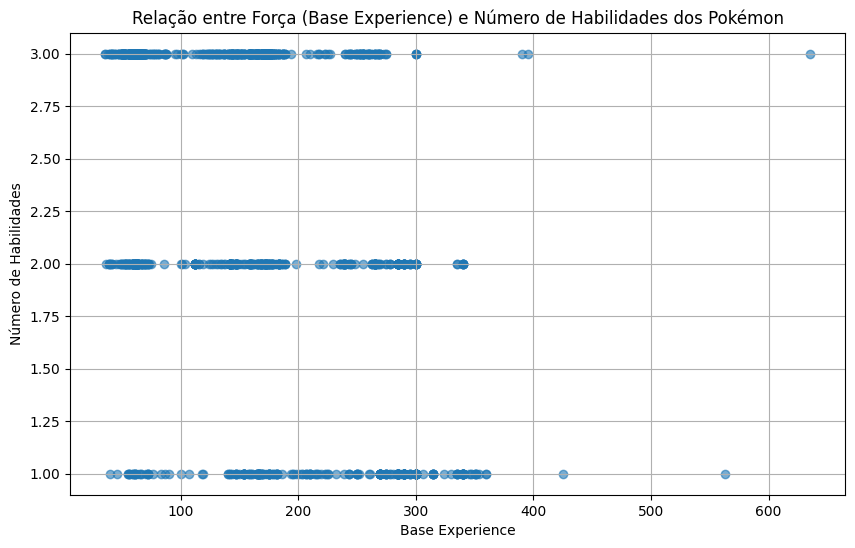

In [42]:
def get_all_pokemon(url="https://pokeapi.co/api/v2/pokemon", limit=100):
    all_pokemon = []
    next_url = f"{url}?limit={limit}"

    while next_url:
        response = requests.get(next_url, timeout=30)
        response.raise_for_status()
        data = response.json()
        all_pokemon.extend(data['results'])
        next_url = data['next']

    return all_pokemon

def get_pokemon_details(url):
    response = requests.get(url, timeout=30)
    response.raise_for_status()
    data = response.json()
    return data

try:
    all_pokemon = get_all_pokemon()
    
    detailed_pokemon_data = []

    for pokemon in all_pokemon:
        details = get_pokemon_details(pokemon['url'])
        
        pokemon_info = {
            'id': details['id'],
            'name': details['name'],
            'base_experience': details['base_experience'],
            'num_abilities': len(details['abilities']),
            'abilities': ', '.join([ability['ability']['name'] for ability in details['abilities']]),
        }
        detailed_pokemon_data.append(pokemon_info)

    df_pokemon = pd.DataFrame(detailed_pokemon_data)
    print(df_pokemon.head(10))

    # Criando o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pokemon['base_experience'], df_pokemon['num_abilities'], alpha=0.6)
    plt.title('Relação entre Força (Base Experience) e Número de Habilidades dos Pokémon')
    plt.xlabel('Base Experience')
    plt.ylabel('Número de Habilidades')
    plt.grid(True)
    plt.show()

except requests.exceptions.Timeout:
    print("A conexão com a API expirou.")
except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro ao tentar acessar a API: {e}")


In [45]:
git remoto adicionar origem https://github.com/anacarolinasant/Pokemon---Final.git
 git branch -M principal 

SyntaxError: invalid syntax (2910524171.py, line 1)